# Anticipez les besoins en consommation électrique de bâtiments
Nous travaillons pour la ville de Seattle. Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, notre équipe s’intéresse de près aux émissions des bâtiments non destinés à l’habitation individuelle. Des relevés minutieux ont été effectués en 2015 et en 2016. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, nous voulons tenter de prédire les émissions de CO2 et la consommation totale d’énergie des bâtiments pour lesquels elles n’ont pas encore été mesurées.

# Sommaire :
- **Partie 1**: <a href="#C1">Importation des données</a>
- **Partie 2**: <a href="#C2">Union des deux jeux de données</a>
    - <a href="#C3">Décomposition de la varibale `Location`</a>
    - <a href="#C4">Renommage de varibales</a>
    - <a href="#C5">Suppression de variables</a>
    - <a href="#C6">Regroupement des jeux de données</a>
- **Partie 3**: <a href="#C7">Nettoyage du jeu de données</a>
    - <a href="#C8">Valeurs Manquantes</a>
    - <a href="#C9">Doublons</a>
    - <a href="#C10">Détection d'outliers</a>
    - <a href="#C11">Vérification des types de bâtiments</a>
- **Partie 4**: <a href="#C12">Feature Engineering</a>
    - <a href="#C13">Calcul de l'âge des bâtiments</a>
    - <a href="#C14">Transfromation des variables catégorielles en variables numériques</a>
    - <a href="#C15">Transformation logarithmique des variables continues</a>
    - <a href="#C16">Sélection des variables pertinentes</a>
- **Partie 5**: <a href="#C17">Exploration des données </a>
    - <a href="#C18">Représentation empririque des variables</a>
    - <a href="#C19">Analyses Bivariées</a>
- **Partie 6**: <a href="#C20">Exportation des jeux de données</a>

# <a name="C1">Partie 1: Importation des données </a>
Importons tout d'abord les librairies utiles pour le nettoyage et l'exploration des données.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from statsmodels.formula.api import ols
import statsmodels.api as sm

pd.set_option('display.max_columns', 100)

On peut à présent charger les deux jeux de données.

In [2]:
data_original_2015 = pd.read_csv('2015-building-energy-benchmarking.csv',sep=',',encoding='utf-8')
data_2015 = data_original_2015.copy()
data_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [3]:
data_original_2016 = pd.read_csv('2016-building-energy-benchmarking.csv',sep=',',encoding='utf-8')
data_2016 = data_original_2016.copy()
data_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


# <a name="C2">Partie 2: Union des deux jeux de données</a>
Afin d'avoir une plus grande quantité de données et d'en faciliter l'exploitation, on va regrouper les deux jeux de données. Pour faire cela il nous faut d'abord contrôler si les deux dataframes ont la même structure, notamment les mêmes variables.

In [4]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [5]:
data_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

Le premier problème qui apparait est que les deux jeux de données n'ont pas le même nombre de colonnes mais également des variables différentes. Intéressons-nous aux variables qui diffèrent d'un jeu de données à l'autre.

In [6]:
print("Colonnes présentes dans le jeu de 2015 mais absentes dans celui de 2016:")
print(set(data_2015.columns).difference(set(data_2016.columns)))

Colonnes présentes dans le jeu de 2015 mais absentes dans celui de 2016:
{'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'City Council Districts', 'Location', 'OtherFuelUse(kBtu)', 'Zip Codes', 'SPD Beats', 'Comment', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas'}


In [7]:
print("Colonnes présentes dans le jeu de 2016 mais absentes dans celui de 2015:")
print(set(data_2016.columns).difference(set(data_2015.columns)))

Colonnes présentes dans le jeu de 2016 mais absentes dans celui de 2015:
{'City', 'State', 'Address', 'GHGEmissionsIntensity', 'TotalGHGEmissions', 'Longitude', 'Comments', 'Latitude', 'ZipCode'}


## <a name="C3">2.1: Décomposition de la variable `Location`</a>
Tout d'abord, il semblerait que dans le jeu de données de 2016, il a été fait le choix de décomposer la variable `Location` en plusieurs variables. On va ainsi adopter le même modèle pour le jeu de données de 2015.

In [8]:
data_2015['Location'][0]

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

In [9]:
#On change le type de la varibale en dictionnaire pour en faire un panda Series
data_2015['Location'] = data_2015['Location'].apply(eval)
location = data_2015["Location"].apply(pd.Series)
location['human_address']=location['human_address'].apply(eval)
location

,latitude,longitude,human_address
0,47.61219025,-122.33799744,"{'address': '405 OLIVE WAY', 'city': 'SEATTLE'..."
1,47.61310583,-122.33335756,"{'address': '724 PINE ST', 'city': 'SEATTLE', ..."
2,47.61334897,-122.33769944,"{'address': '1900 5TH AVE', 'city': 'SEATTLE',..."
3,47.61421585,-122.33660889,"{'address': '620 STEWART ST', 'city': 'SEATTLE..."
4,47.6137544,-122.3409238,"{'address': '401 LENORA ST', 'city': 'SEATTLE'..."
...,...,...,...
3335,47.59950256,-122.32034302,"{'address': '321 10TH AVE S', 'city': 'SEATTLE..."
3336,47.65752471,-122.3160159,"{'address': '4123 12TH AVE NE', 'city': 'SEATT..."
3337,47.61649845,-122.33770787,"{'address': '2030 8TH AVE', 'city': 'SEATTLE',..."
3338,47.68396954,-122.2874088,"{'address': '3801 NE 77TH ST', 'city': 'SEATTL..."


In [10]:
#On refait de même avec la variable human_address
location= pd.concat([location.drop(['human_address'], axis=1), location['human_address'].apply(pd.Series)], axis=1 )
location

,latitude,longitude,address,city,state,zip
0,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121
...,...,...,...,...,...,...
3335,47.59950256,-122.32034302,321 10TH AVE S,SEATTLE,WA,98104
3336,47.65752471,-122.3160159,4123 12TH AVE NE,SEATTLE,WA,98105
3337,47.61649845,-122.33770787,2030 8TH AVE,SEATTLE,WA,98121
3338,47.68396954,-122.2874088,3801 NE 77TH ST,SEATTLE,WA,98115


In [11]:
#On renomme les colonnes pour avoir la correspondance avec les données de 2016
location = location.rename(columns={"latitude":"Latitude", 
                                  "longitude":"Longitude",
                                  "address":"Address", 
                                  "city":"City", 
                                  "state":"State", 
                                  "zip":"ZipCode"})
#On concatène dans le jeu de données de 2015 et on supprime l'ancienne variable Location
data_2015= pd.concat([data_2015.drop(["Location"], axis=1), location], axis=1 )
data_2015.iloc[:,-8:]

,SPD Beats,Zip Codes,Latitude,Longitude,Address,City,State,ZipCode
0,31.0,18081,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,31.0,18081,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,31.0,18081,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,31.0,18081,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,31.0,19576,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121
...,...,...,...,...,...,...,...,...
3335,16.0,18379,47.59950256,-122.32034302,321 10TH AVE S,SEATTLE,WA,98104
3336,38.0,18383,47.65752471,-122.3160159,4123 12TH AVE NE,SEATTLE,WA,98105
3337,7.0,19576,47.61649845,-122.33770787,2030 8TH AVE,SEATTLE,WA,98121
3338,48.0,18792,47.68396954,-122.2874088,3801 NE 77TH ST,SEATTLE,WA,98115


## <a name="C4">2.2: Renommage de variables</a>
Certaines variables ont des noms similaires et laissent penser qu'elles représentent une même quantité.

In [12]:
data_2016['GHGEmissionsIntensity'].describe()

count    3367.000000
mean        1.175916
std         1.821452
min        -0.020000
25%         0.210000
50%         0.610000
75%         1.370000
max        34.090000
Name: GHGEmissionsIntensity, dtype: float64

In [13]:
data_2015['GHGEmissionsIntensity(kgCO2e/ft2)'].describe()

count    3330.000000
mean        0.985339
std         1.637172
min         0.000000
25%         0.080000
50%         0.460000
75%         1.180000
max        31.380000
Name: GHGEmissionsIntensity(kgCO2e/ft2), dtype: float64

Les ordres de grandeurs étant semblables on fait le choix de regrouper ces deux variables en conservant le nom utilisé en 2015 car il possède en plus l'unité de mesure uilisée, ce qui pourrait se révéler utile par la suite.

In [14]:
data_2016 = data_2016.rename(columns={"GHGEmissionsIntensity":"GHGEmissionsIntensity(kgCO2e/ft2)"})

In [15]:
data_2016['TotalGHGEmissions'].describe()

count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

In [16]:
data_2015['GHGEmissions(MetricTonsCO2e)'].describe()

count     3330.000000
mean       110.094102
std        409.450179
min          0.000000
25%          9.265000
50%         32.740000
75%         88.642500
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

In [17]:
data_2016 = data_2016.rename(columns={"TotalGHGEmissions":"GHGEmissions(MetricTonsCO2e)"})

## <a name="C5">2.3: Suppression de variables</a>

In [18]:
data_2016['Comments'].isnull().mean()

1.0

In [19]:
data_2015['Comment'].isnull().mean()

0.9961077844311377

In [20]:
data_2015['Comment'].unique()

array([nan,
       'Under construction starting 6/2013 (old building demolished) and ending 9/2016. New Building re-opened 9/2016. Year built changed from 1948 to 2016.',
       "Part of McKinstry's campus, property operates a fabrication and production shop and is conditioned by natural gas overhead radiant unit heaters with no cooling. Learn more at www.mckinstry.com.",
       "One of two office buildings on McKinstry's campus partially remodeled in 2009 from warehouse to office space. Served by rooftop air handling units with underfloor VAVs.  Self-performed energy efficiency upgrades in 2015 include a long-term LED lighting re",
       'Part of McKinstry’s campus, this remodeled warehouse is mainly office but includes a full-size basketball court and gym with locker rooms, bistro with a full kitchen, and data center. Served by rooftop package units for heating and cooling. Upgrades inclu',
       'Construction completed in mid 2015. The building was unoccupied for most of 2015.',
 

Les deux variables `Comments` et `Comment` représentent probablement la même quantité mais elles sont vides ou presque vides avec des données que l'on ne peut pas évaluer. On fait donc le choix de les supprimer, de même que les autres variables présentent dans le jeu de données de 2015 mais absentes de celui de 2016.

In [21]:
data_2016 = data_2016.drop(['Comments'], axis=1)
data_2015 = data_2015.drop(['City Council Districts', 'Comment', 'Zip Codes', 'OtherFuelUse(kBtu)', 
                            'Seattle Police Department Micro Community Policing Plan Areas', '2010 Census Tracts', 'SPD Beats'],
                           axis=1)

## <a name="C6">2.4: Regroupement des jeux de données</a>
Il ne nous reste plus qu'à vérifier la correspondance des types avant de pouvoir fusionner les deux jeux de données.

In [22]:
dfType = pd.DataFrame([data_2015.dtypes, data_2016.dtypes])
dfType

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
0,int64,int64,object,object,object,object,int64,object,int64,int64,float64,int64,int64,int64,object,object,float64,object,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,object,object,object
1,int64,int64,object,object,object,object,int64,object,int64,float64,int64,int64,int64,int64,object,object,float64,object,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,object,object,float64,float64,object,object,object,float64


In [23]:
data_2015['NumberofFloors'] = data_2015['NumberofFloors'].notna().astype('int64')
data_2015[['Latitude','Longitude', 'ZipCode']] = data_2015[['Latitude','Longitude', 'ZipCode']].astype('float64')
data_2016['NumberofBuildings'] = data_2016['NumberofBuildings'].notna().astype('int64')

In [24]:
data_2015['DefaultData'].unique()

array(['No', 'Yes', nan], dtype=object)

In [25]:
data_2016.loc[data_2016['DefaultData']==False, 'DefaultData'] = 'No'
data_2016.loc[data_2016['DefaultData']==True, 'DefaultData'] = 'Yes'

In [26]:
dfType = pd.DataFrame([data_2015.dtypes, data_2016.dtypes])
dfType

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
0,int64,int64,object,object,object,object,int64,object,int64,int64,int64,int64,int64,int64,object,object,float64,object,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,float64,float64,object,object,object,float64
1,int64,int64,object,object,object,object,int64,object,int64,int64,int64,int64,int64,int64,object,object,float64,object,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,float64,float64,object,object,object,float64


Les types sont bien les mêmes dans chaque jeu de données, on peut maintenant concaténer les deux jeux de données.

In [27]:
data = pd.concat([data_2015, data_2016], ignore_index=True)

In [28]:
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,1,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,249.43,2.64,No,Compliant,NaN,47.612190,-122.337997,405 OLIVE WAY,SEATTLE,WA,98101.0
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,1,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,263.51,2.38,No,Compliant,NaN,47.613106,-122.333358,724 PINE ST,SEATTLE,WA,98101.0
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,1,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,2061.48,1.92,Yes,Compliant,NaN,47.613349,-122.337699,1900 5TH AVE,SEATTLE,WA,98101.0
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,1,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,1936.34,31.38,No,Compliant,High Outlier,47.614216,-122.336609,620 STEWART ST,SEATTLE,WA,98101.0
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,1,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,507.70,4.02,No,Compliant,NaN,47.613754,-122.340924,401 LENORA ST,SEATTLE,WA,98121.0


# <a name="C7">Partie 3: Nettoyage du jeu de données</a>
## <a name="C8">3.1: Valeurs manquantes</a>
Ce qui nous intéresse tout d'abord est de quantifier la quantité de valeurs manquantes pour chaque variable.

In [29]:
def quantite_valeurs_manquantes(data):
    """fonction permettant d'obtenir le nombre et le pourcentage de valeurs manquantes pour chaque variable d'un dataframe, 
    dans l'ordre décroissant"""
    
    valeurs = data.isnull().sum()
    pourcentage = 100 * data.isnull().sum() / len(data)
    table = pd.concat([valeurs, pourcentage.round(2)], axis=1)
    table.columns = ['Nombre de valeurs manquantes', '% de valeurs manquantes']
    
    return table[table['Nombre de valeurs manquantes'] != 0].sort_values('% de valeurs manquantes', ascending = False).style.background_gradient('OrRd')

In [30]:
quantite_valeurs_manquantes(data)

,Nombre de valeurs manquantes,% de valeurs manquantes
Outlier,6600,98.270000
YearsENERGYSTARCertified,6487,96.590000
ThirdLargestPropertyUseType,5560,82.790000
ThirdLargestPropertyUseTypeGFA,5560,82.790000
SecondLargestPropertyUseType,3478,51.790000
SecondLargestPropertyUseTypeGFA,3478,51.790000
ENERGYSTARScore,1623,24.170000
LargestPropertyUseType,156,2.320000
LargestPropertyUseTypeGFA,156,2.320000
ListOfAllPropertyUseTypes,136,2.030000


On peut distinguer deux groupes:
- un premier groupe de 6 ou 7 variables pour lequel la quantité de valeurs manquantes est assez importante
- un second pour lequel la quantité de valeurs manquantes est très faible

Les relevés ayant été fastidieux et onéreux on veut essayer de combler au maximum les valeurs manquantes. </br>
Tout d'abord, pour les variables quantitatives avec de faibles pourcentages de valeurs manquantes, on complète les trous avec la valeur moyenne. Comme une grande quantité d'information est connue, la moyenne empirique est relativement proche de sa valeur vraie.

In [31]:
#Liste des variables quantitatives avec faible pourcentage de valeurs manquantes
listeVariables = ['SiteEnergyUse(kBtu)', 'SiteEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)', 'SiteEUI(kBtu/sf)', 'NaturalGas(kBtu)',
                 'SourceEUI(kBtu/sf)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'NaturalGas(therms)', 'SteamUse(kBtu)', 
                  'Electricity(kWh)', 'Electricity(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'SourceEUIWN(kBtu/sf)', 
                 'LargestPropertyUseTypeGFA']

imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(data[listeVariables])

data[listeVariables] = imputer.transform(data[listeVariables])

In [32]:
quantite_valeurs_manquantes(data)

,Nombre de valeurs manquantes,% de valeurs manquantes
Outlier,6600,98.270000
YearsENERGYSTARCertified,6487,96.590000
ThirdLargestPropertyUseType,5560,82.790000
ThirdLargestPropertyUseTypeGFA,5560,82.790000
SecondLargestPropertyUseType,3478,51.790000
SecondLargestPropertyUseTypeGFA,3478,51.790000
ENERGYSTARScore,1623,24.170000
LargestPropertyUseType,156,2.320000
ListOfAllPropertyUseTypes,136,2.030000
ZipCode,16,0.240000


Pour les valeurs manquantes de la variable `ZipCode` on va remplacer les valeurs manquantes par la valeur la plus fréquente. Le pourcentage de valeurs manquantes étant faible on ne va pas faire une grande erreur. De plus, il ne s'agit à priori pas de la variable la plus pertinente pour la prédiction des émissions de CO2 et il serait dommage de supprimer des modalités seulement car on ne connaît pas leur ZipCode.
On va faire de même avec les variables `DefaultData` et `TaxParcelIdentificationNumber`.

In [33]:
listeVariables = ['ZipCode', 'DefaultData', 'TaxParcelIdentificationNumber']

imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(data[listeVariables])

data[listeVariables] = imputer.transform(data[listeVariables])

quantite_valeurs_manquantes(data)

,Nombre de valeurs manquantes,% de valeurs manquantes
Outlier,6600,98.270000
YearsENERGYSTARCertified,6487,96.590000
ThirdLargestPropertyUseType,5560,82.790000
ThirdLargestPropertyUseTypeGFA,5560,82.790000
SecondLargestPropertyUseType,3478,51.790000
SecondLargestPropertyUseTypeGFA,3478,51.790000
ENERGYSTARScore,1623,24.170000
LargestPropertyUseType,156,2.320000
ListOfAllPropertyUseTypes,136,2.030000


La variable `ListOfAllPropertyUseTypes` regroupe les données des trois variables `LargestPropertyUseType`, `SecondLargestPropertyUseType` et `ThirdLargestPropertyUseType`. On peut donc s'en servir pour compléter une partie des valeurs manquantes. Pour les bâtiments n'ayant qu'une ou deux utilités principales, on complètera les valeurs manquantes par la mention **NoSecondUse** ou **NoThirdUse**.

In [34]:
data.dropna(subset=['ListOfAllPropertyUseTypes'], axis=0, inplace=True)
quantite_valeurs_manquantes(data)

,Nombre de valeurs manquantes,% de valeurs manquantes
Outlier,6465,98.250000
YearsENERGYSTARCertified,6351,96.520000
ThirdLargestPropertyUseType,5424,82.430000
ThirdLargestPropertyUseTypeGFA,5424,82.430000
SecondLargestPropertyUseType,3342,50.790000
SecondLargestPropertyUseTypeGFA,3342,50.790000
ENERGYSTARScore,1588,24.130000
LargestPropertyUseType,20,0.300000


Les données de la variable `ListOfAllPropertyUseTypes` sont des chaînes de caractères représentant la liste des usages de la forme: **'Premier usage, Second usage, Troisième usage'**. On veut modifier la forme des données pour avoir une liste de chaînes de caractères de la forme: **('Premier usage', 'Second usage', 'Troisième usage')**.

In [35]:
data['ListOfAllPropertyUseTypes'] = data['ListOfAllPropertyUseTypes'].astype('string')

In [36]:
def fun(chaine):
    """Fonction pour transformer la chaine de la liste des usages des bâtiments en une liste de chaines des usages"""
    
    tab = chaine.split(", ")
    if len(tab) == 1:
        tab.append('NoSecondUse')
        tab.append('NoThirdUse')
    elif len(tab) == 2:
        tab.append('NoThirdUse')
    return tab

In [37]:
data['ListOfAllPropertyUseTypes'] = data['ListOfAllPropertyUseTypes'].apply(fun)
data['ListOfAllPropertyUseTypes']

0                        [Hotel, NoSecondUse, NoThirdUse]
1                            [Hotel, Parking, Restaurant]
2                         [Hotel, Parking, Swimming Pool]
3                        [Hotel, NoSecondUse, NoThirdUse]
4                         [Hotel, Parking, Swimming Pool]
                              ...                        
6711                    [Office, NoSecondUse, NoThirdUse]
6712        [Other - Recreation, NoSecondUse, NoThirdUse]
6713    [Fitness Center/Health Club/Gym, Other - Recre...
6714    [Fitness Center/Health Club/Gym, Food Service,...
6715    [Fitness Center/Health Club/Gym, Food Service,...
Name: ListOfAllPropertyUseTypes, Length: 6580, dtype: object

In [38]:
#On transorme la variable en dataframe pour pouvoir récupérer facilement les colonnes 
df = data['ListOfAllPropertyUseTypes'].apply(pd.Series)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Hotel,NoSecondUse,NoThirdUse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hotel,Parking,Restaurant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hotel,Parking,Swimming Pool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hotel,NoSecondUse,NoThirdUse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hotel,Parking,Swimming Pool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,Office,NoSecondUse,NoThirdUse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6712,Other - Recreation,NoSecondUse,NoThirdUse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6713,Fitness Center/Health Club/Gym,Other - Recreation,Swimming Pool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6714,Fitness Center/Health Club/Gym,Food Service,Office,Other - Recreation,Pre-school/Daycare,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
#On ne modifie pas uniquement les valeurs manquantes mais toutes les valeurs pour corriger par la même occasion les éventuelles
#erreurs de saisies lors du découpage initial de la liste des usages en trois variables distinctes
data['LargestPropertyUseType'] = df.iloc[:,0]
data['SecondLargestPropertyUseType'] = df.iloc[:,1]
data['ThirdLargestPropertyUseType'] = df.iloc[:,2]

#On peut à présent supprimer la variable ListOfAllPropertyUseTypes
data.drop(['ListOfAllPropertyUseTypes'], axis=1, inplace=True)

In [40]:
quantite_valeurs_manquantes(data)

,Nombre de valeurs manquantes,% de valeurs manquantes
Outlier,6465,98.250000
YearsENERGYSTARCertified,6351,96.520000
ThirdLargestPropertyUseTypeGFA,5424,82.430000
SecondLargestPropertyUseTypeGFA,3342,50.790000
ENERGYSTARScore,1588,24.130000


In [41]:
data['ThirdLargestPropertyUseType'].value_counts()

NoThirdUse                                    5419
Parking                                        317
Retail Store                                   275
Office                                         114
Other                                          102
Restaurant                                      85
Swimming Pool                                   51
Supermarket/Grocery Store                       23
Other - Recreation                              16
Social/Meeting Hall                             16
Other - Restaurant/Bar                          13
Refrigerated Warehouse                          13
Other - Services                                13
Personal Services (Health/Beauty                12
Other - Entertainment/Public Assembly           11
Self-Storage Facility                           10
Other - Lodging/Residential                     10
Multifamily Housing                              8
Locksmith                                        8
Senior Care Community          

In [42]:
data['SecondLargestPropertyUseType'].value_counts()

NoSecondUse                              3334
Parking                                  1515
Office                                    670
Retail Store                              255
Other                                     181
Multifamily Housing                       101
Restaurant                                 85
Non-Refrigerated Warehouse                 56
Senior Care Community                      43
Worship Facility                           42
Supermarket/Grocery Store                  38
Other - Services                           21
Medical Office                             21
Swimming Pool                              19
Other - Entertainment/Public Assembly      18
Other - Restaurant/Bar                     17
Other - Recreation                         15
Food Service                               13
Residence Hall/Dormitory                    8
Laboratory                                  8
Shoe                                        8
Distribution Center               

Une majeur partie des valeurs manquantes des variables `SecondLargestPropertyUseTypeGFA` et `ThirdLargestPropertyUseTypeGFA` doivent provenir du fait que certains bâtiments n'ont pas de deuxième ou troisième fonction. Par conséquent, ces bâtiments n'engendre pas de pollution liée à une deuxième ou troisième activité et on peut remplacer les valeurs manquantes par 0.

In [43]:
data.loc[data['SecondLargestPropertyUseType']=='NoSecondUse', 'SecondLargestPropertyUseTypeGFA'] = data.loc[data['SecondLargestPropertyUseType']=='NoSecondUse', 'SecondLargestPropertyUseTypeGFA'].fillna(value=0)
data.loc[data['ThirdLargestPropertyUseType']=='NoThirdUse', 'ThirdLargestPropertyUseTypeGFA'] = data.loc[data['ThirdLargestPropertyUseType']=='NoThirdUse', 'ThirdLargestPropertyUseTypeGFA'].fillna(value=0)

In [44]:
quantite_valeurs_manquantes(data)

,Nombre de valeurs manquantes,% de valeurs manquantes
Outlier,6465,98.250000
YearsENERGYSTARCertified,6351,96.520000
ENERGYSTARScore,1588,24.130000
ThirdLargestPropertyUseTypeGFA,20,0.300000
SecondLargestPropertyUseTypeGFA,19,0.290000


Pour les dernières valeurs manquantes de `SecondLargestPropertyUseTypeGFA` et `ThirdLargestPropertyUseTypeGFA`, on va compléter par la valeur moyenne en ne considérant que les bâtiments avec un deuxième ou troisième usage.

In [45]:
masque = data['SecondLargestPropertyUseType'].isnull()

imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(data.loc[~masque,['SecondLargestPropertyUseTypeGFA']])

data.loc[~masque, ['SecondLargestPropertyUseTypeGFA']] = imputer.transform(data.loc[~masque, ['SecondLargestPropertyUseTypeGFA']])

quantite_valeurs_manquantes(data)

,Nombre de valeurs manquantes,% de valeurs manquantes
Outlier,6465,98.250000
YearsENERGYSTARCertified,6351,96.520000
ENERGYSTARScore,1588,24.130000
ThirdLargestPropertyUseTypeGFA,20,0.300000


In [46]:
masque = data['ThirdLargestPropertyUseType'].isnull()

imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(data.loc[~masque,['ThirdLargestPropertyUseTypeGFA']])

data.loc[~masque, ['ThirdLargestPropertyUseTypeGFA']] = imputer.transform(data.loc[~masque, ['ThirdLargestPropertyUseTypeGFA']])

quantite_valeurs_manquantes(data)

,Nombre de valeurs manquantes,% de valeurs manquantes
Outlier,6465,98.250000
YearsENERGYSTARCertified,6351,96.520000
ENERGYSTARScore,1588,24.130000


On va supprimer la variable `YearsENERGYSTARCertified` qui a trop de valeurs manquantes et ne semble pas utile pour la suite. On conserve pour l'instant la variable `Outlier` qui pourra peut-être nous servir plus tard pour la détection d'outliers.

In [47]:
data.drop(['YearsENERGYSTARCertified'], axis=1, inplace=True)
quantite_valeurs_manquantes(data)

,Nombre de valeurs manquantes,% de valeurs manquantes
Outlier,6465,98.250000
ENERGYSTARScore,1588,24.130000


In [48]:
data[data['ENERGYSTARScore'].isnull()].head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
5,9,2015,Nonresidential COS,Other,WEST PRECINCT (SEATTLE POLICE),660000560,7,DOWNTOWN,1999,1,1,97288,37198,60090,Police Station,88830.0,NoSecondUse,0.0,NoThirdUse,0.0,NaN,135.7,146.9,313.5,321.6,12051984.0,13045258.0,0.0,2130921.0,7271004.0,47813.0,4781283.0,304.62,2.81,No,Compliant,NaN,47.616439,-122.336764,810 VIRGINIA ST,SEATTLE,WA,98101.0
7,11,2015,NonResidential,Other,PARAMOUNT THEATER,660000955,7,DOWNTOWN,1926,1,1,102761,0,102761,Other - Entertainment/Public Assembly,102761.0,NoSecondUse,0.0,NoThirdUse,0.0,NaN,62.5,71.8,152.2,160.4,6426022.0,7380086.0,2003108.0,1203937.0,4108004.0,3151.0,315079.0,199.99,1.77,No,Compliant,NaN,47.612902,-122.331309,901 PINE ST,SEATTLE,WA,98101.0
15,21,2015,Nonresidential COS,Other,SEATTLE CENTRAL LIBRARY,942000275,7,DOWNTOWN,2004,1,1,412000,57000,355000,Data Center,364913.0,Library,49000.0,Parking,1074.0,NaN,46.0,45.3,140.8,137.6,16849234.0,16594622.0,703184.0,4732136.0,16146718.0,0.0,0.0,166.84,0.24,No,Compliant,NaN,47.606675,-122.332264,1000 4TH AVE,SEATTLE,WA,98104.0
16,22,2015,NonResidential,Other,DOWNTOWN SEATTLE YMCA,942000350,7,DOWNTOWN,1930,1,1,103911,0,103911,Fitness Center/Health Club/Gym,90000.0,Office,40000.0,Swimming Pool,0.0,NaN,79.5,83.4,173.7,178.4,10340282.0,10843936.0,4398022.0,1549824.0,5288219.0,6543.0,654260.0,411.09,3.74,No,Compliant,NaN,47.605446,-122.332802,909 4TH AVE,SEATTLE,WA,98104.0
18,24,2015,NonResidential,Mixed Use Property,RAINIER CLUB (HISTORICAL LANDMARK),942000510,7,DOWNTOWN,1907,1,1,57452,0,57452,Office,16442.0,Other,15505.0,Other - Lodging/Residential,9741.0,NaN,130.2,140.2,278.7,290.2,7481768.0,8052425.0,1755365.0,1106043.0,3773975.0,19526.0,1952583.0,265.50,4.34,No,Compliant,NaN,47.605526,-122.331630,810 4TH AVE,SEATTLE,WA,98104.0


Pour évaluer les valeurs manquantes de la variable `ENERGYSTARScore`, on va utiliser la médiane de la catégorie de bâtiment concernée.

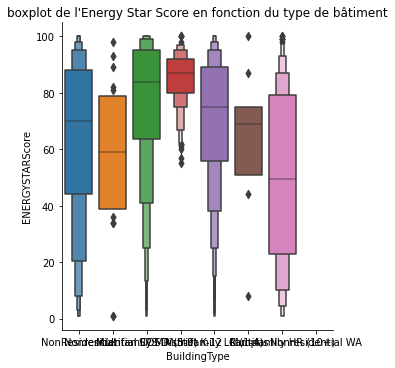

In [49]:
graph = sns.catplot(x='BuildingType', y='ENERGYSTARScore', kind='boxen', data=data)
graph.set(title = "boxplot de l'Energy Star Score en fonction du type de bâtiment")

In [50]:
for batCategorie in data['BuildingType'].unique():
    mediane = (data.loc[data['BuildingType']==batCategorie]).loc[:,'ENERGYSTARScore'].median()
    data.loc[((data['ENERGYSTARScore'].isnull()) & (data['BuildingType']==batCategorie)), 'ENERGYSTARScore'] = mediane

quantite_valeurs_manquantes(data)

,Nombre de valeurs manquantes,% de valeurs manquantes
Outlier,6465,98.250000
ENERGYSTARScore,1,0.020000


In [51]:
data['BuildingType'].value_counts()

NonResidential          2862
Multifamily LR (1-4)    1997
Multifamily MR (5-9)    1116
Multifamily HR (10+)     212
SPS-District K-12        193
Nonresidential COS       153
Campus                    46
Nonresidential WA          1
Name: BuildingType, dtype: int64

La catégorie **Nonresidential WA** ne comportant qu'un seul individu, on ne peut évaluer sa valeur médiane. On fait le choix de supprimer cet individu.

In [52]:
masque = data['BuildingType']=='Nonresidential WA'
data = data[~masque]
quantite_valeurs_manquantes(data)

,Nombre de valeurs manquantes,% de valeurs manquantes
Outlier,6464,98.250000


## <a name="C9">3.2: Doublons</a>
Regardons à présent si certains bâtiments apparaissent plusieurs fois. On peut commencer par regarder si il y a des lignes identiques.

In [53]:
data.loc[data.duplicated()]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode


Aucune ligne n'est identique à une autre mais cela ne garantit pas complètement l'absence de doublons. On peut utiliser la variable `OSEBuildingID` qui permet d'identifier un bâtiment de manière unique, ainsi que la variable `DataYear` qui correspond à l'année des relevés. Chaque bâtiment ne doit apparaître qu'une seule fois par année de relevés.

In [54]:
data.loc[data[['OSEBuildingID', 'DataYear']].duplicated(keep=False),:]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode


Aucun bâtiment n'apparaît deux fois pour une même année de relevés, on accepte alors l'hypothèse qu'il n'y a pas de doublons dans le jeu de données. 

## <a name="C10">3.3: Détection d'outliers</a>
Regardons tout d'abord si la variable `Outlier` peut nous être utile.

In [55]:
data[~(data['Outlier'].isnull())].head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,1,61320,0,61320,Hotel,61320.0,NoSecondUse,0.0,NoThirdUse,0.0,1.0,460.400000,462.500000,636.300000,643.200000,2.822932e+07,2.836344e+07,2.345852e+07,8.115210e+05,2.769023e+06,20019.000000,2.001894e+06,1936.340000,31.380000,No,Compliant,High Outlier,47.614216,-122.336609,620 STEWART ST,SEATTLE,WA,98101.0
62,87,2015,SPS-District K-12,K-12 School,ARBOR HEIGHTS ELEMENTARY SCHOOL (SPS-DISTRICT),2518400005,1,SOUTHWEST,1948,1,1,53352,0,53352,K-12 School,53352.0,NoSecondUse,0.0,NoThirdUse,0.0,87.0,54.182341,57.308522,133.510303,138.356802,5.194673e+06,5.240110e+06,2.625076e+05,1.052458e+06,3.591058e+06,13112.227383,1.311223e+06,114.935638,1.081154,Yes,Compliant,Low Outlier,47.509354,-122.378222,3701 SW 104TH ST,SEATTLE,WA,98146.0
228,350,2015,NonResidential,Large Office,SECOND AND SPRING BUILDING,942000045,7,DOWNTOWN,1958,1,1,172842,25920,146922,Data Center,92310.0,Office,39336.0,Parking,25000.0,70.0,312.100000,315.100000,955.200000,958.300000,4.109208e+07,4.147840e+07,0.000000e+00,1.158346e+07,3.952441e+07,15693.000000,1.569312e+06,358.880000,1.090000,No,Compliant,High Outlier,47.606016,-122.335696,1100 2ND AVE,SEATTLE,WA,98101.0
322,457,2015,NonResidential,Large Office,1441 LAKE UNION CENTER,2264501110,4,LAKE UNION,2001,1,1,103697,47656,56041,Office,63199.0,NoSecondUse,0.0,NoThirdUse,0.0,1.0,242.500000,252.400000,535.600000,535.200000,1.532478e+07,1.595039e+07,0.000000e+00,2.489958e+06,8.496089e+06,68290.000000,6.829040e+06,421.920000,3.720000,No,Compliant,High Outlier,47.647797,-122.339264,1441 N 34TH ST,SEATTLE,WA,98103.0
387,539,2015,NonResidential,Retail Store,UNIVERSITY CENTER,5335200380,4,NORTHEAST,1987,1,1,69492,0,69492,Other,69800.0,Retail Store,0.0,NoThirdUse,0.0,100.0,5.900000,5.900000,18.400000,18.400000,4.085130e+05,4.085130e+05,0.000000e+00,1.197280e+05,4.085300e+05,0.000000,0.000000e+00,2.850000,0.020000,Yes,Compliant,Low Outlier,47.661726,-122.317961,4500 9TH AVE NE,SEATTLE,WA,98105.0


In [56]:
data['Outlier'].value_counts()

High Outlier    45
Low Outlier     38
Low outlier     23
High outlier     9
Name: Outlier, dtype: int64

On va supprimer les **High Outliers** qui pourraient biaiser nos modèles de prédiction par la suite.

In [57]:
masque = (data['Outlier']=='High Outlier') |  (data['Outlier']=='High outlier')
data = data[~masque]

data['Outlier'].value_counts()

Low Outlier    38
Low outlier    23
Name: Outlier, dtype: int64

On regarde à présent si certaines années de constructions paraissent aberrantes.

In [58]:
data['YearBuilt'].unique()

array([1927, 1996, 1969, 1980, 1999, 1926, 1904, 1910, 1998, 1928, 2004,
       1930, 1983, 1907, 1916, 1985, 1961, 2001, 1991, 1955, 1978, 1949,
       1989, 1906, 1994, 1990, 1950, 1900, 1954, 1911, 1973, 1920, 1982,
       1908, 2000, 1997, 1962, 1922, 1970, 2008, 1948, 1965, 1929, 2010,
       1938, 1986, 2002, 1923, 2003, 1957, 1964, 1941, 1963, 1959, 2006,
       1915, 1958, 2009, 2011, 1971, 2007, 1951, 1953, 1952, 1960, 1937,
       1966, 1968, 1925, 1924, 2005, 1909, 1931, 1972, 1914, 1913, 1917,
       1995, 1981, 1976, 1988, 1979, 1947, 1984, 1956, 1912, 1977, 1921,
       1945, 1992, 1974, 1975, 1967, 1987, 1940, 1932, 1993, 1918, 1905,
       1902, 1939, 1944, 1946, 1942, 1903, 2012, 2013, 1901, 1919, 2014,
       1936, 2015, 1935], dtype=int64)

Aucune valeur ne pose problème ici.

Pour le nombre de bâtiments et d'étages on vérifie qu'aucune valeur ne soit négative, ou égale à 0 pour le nombre de bâtiments.

In [59]:
data['NumberofBuildings'].describe()

count    6525.000000
mean        1.017318
std         0.556584
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        39.000000
Name: NumberofBuildings, dtype: float64

In [60]:
data['NumberofFloors'].describe()

count    6525.000000
mean        2.909425
std         4.365917
min         0.000000
25%         1.000000
50%         1.000000
75%         4.000000
max        99.000000
Name: NumberofFloors, dtype: float64

Les minimums sont égaux à 1 et 0 respectivement, aucune erreur à signaler ici.

On vérifie que l'Energy Star Score est bien compris entre 0 et 100.

In [61]:
data['ENERGYSTARScore'].describe()

count    6525.000000
mean       69.170421
std        23.441503
min         1.000000
25%        59.000000
50%        71.000000
75%        86.000000
max       100.000000
Name: ENERGYSTARScore, dtype: float64

Enfin, pour les variables continues, représentant des quantités (surface, consommation, émissions), on veut vérifier qu'il n'y ait pas de valeurs négatives.

In [62]:
listeVariablesContinues = ['PropertyGFATotal', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 
                          'Electricity(kBtu)', 'NaturalGas(kBtu)', 'GHGEmissions(MetricTonsCO2e)',
                           'GHGEmissionsIntensity(kgCO2e/ft2)']
l = []
for var in listeVariablesContinues:
    if data[var].min()<0:
        l.append(var)
print(l)

['Electricity(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)']


In [63]:
masque = ((data['GHGEmissionsIntensity(kgCO2e/ft2)']<0) | (data['GHGEmissions(MetricTonsCO2e)']<0) |
            (data['Electricity(kBtu)']<0))

data = data[~masque]

In [64]:
for var in listeVariablesContinues:
    if data[var].min()<0:
        l.append(var)
print(l)

['Electricity(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)']


## <a name="C11">3.4: Vérification des types de bâtiments</a>
L'objectif est de prédire les émissions des bâtiments non destinés à l'habitation individuelle. On va vérifier que les bâtiments présents dans le jeu de données vérifient cette condition.

In [65]:
data['LargestPropertyUseType'].unique()

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Multifamily Housing', 'Data Center',
       'Fitness Center/Health Club/Gym', 'Office', 'Courthouse', 'Other',
       'K-12 School', 'College/University', 'Automobile Dealership',
       'Self-Storage Facility', 'Non-Refrigerated Warehouse', 'Parking',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle', 'Food Service',
       'Residence Hall/Dormitory', 'Restaurant',
       'Other/Specialty Hospital', 'Financial Office', 'Laboratory',
       'Fast Food Restaurant', 'Worship Facility',
       'Convenience Store without Gas Station',
       'Supermarket/Grocery Store', 'Distribution Center', 'Bank Branch',
       'Food Sales', 'Movie Theater', 'Convention Center',
       'Urgent Care/Clinic/Other Outpatient', 'Adult Education',
       'Wholesale Club/Supercenter', 'Strip Mall',
       'Refrigerated Wa

Les deux types de bâtiments qui peuvent poser question sont les suivants: **Multifamily Housing** et **Other - Lodging/Residential**. 

In [66]:
data[data['LargestPropertyUseType']=='Multifamily Housing'].shape

(3194, 43)

Le premier type désigne les immeubles et représente presque la moitié du jeu de données. Ces bâtiments ne doivent pas être présents par erreur, et représentent donc un intérêt réel pour la ville de Seattle.

In [67]:
data[data['LargestPropertyUseType']=='Other - Lodging/Residential'].shape

(10, 43)

In [68]:
data[data['LargestPropertyUseType']=='Other - Lodging/Residential']

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode
1950,23863,2015,NonResidential,Other,WM BOOTH CNTR,7666202690,2,GREATER DUWAMISH,1992,1,1,47836,7572,40264,Other - Lodging/Residential,43336.0,Parking,4500.0,NoThirdUse,0.0,70.0,79.100000,83.200000,165.800000,172.700000,3428334.000,3605154.000,0.0,502939.0000,1716099.0,17123.000000,1712306.0,102.90,2.00,No,Compliant,NaN,47.595407,-122.325440,811 MAYNARD AVE S,SEATTLE,WA,98134.0
2728,26659,2015,Multifamily LR (1-4),Other,ALPHA PHI SORORITY,8823901550,4,NORTHEAST,1928,1,1,22232,0,22232,Other - Lodging/Residential,22232.0,NoSecondUse,0.0,NoThirdUse,0.0,75.0,55.900000,65.000000,97.300000,106.900000,1241738.000,1445061.000,0.0,120603.0000,411515.0,8302.000000,830240.0,46.96,2.03,No,Compliant,NaN,47.663305,-122.306856,4710 19TH AVE NE,SEATTLE,WA,98105.0
2743,26711,2015,NonResidential,Other,ACE HOTEL (UNION GOSPEL MISSION BUILDING),5247800930,7,DOWNTOWN,1904,1,1,29820,0,29820,Other - Lodging/Residential,29820.0,NoSecondUse,0.0,NoThirdUse,0.0,70.0,54.400000,56.300000,130.400000,132.400000,1620721.000,1678285.000,0.0,306733.0000,1046617.0,5741.000000,574148.0,37.79,1.12,No,Compliant,NaN,47.600547,-122.330551,318 2ND AV ET S,SEATTLE,WA,98104.0
2807,26905,2015,NonResidential,Other,KAPPA ALPHA THETA SORORITY,8823902405,4,NORTHEAST,1924,1,1,20686,0,20686,Other - Lodging/Residential,20686.0,NoSecondUse,0.0,NoThirdUse,0.0,70.0,55.100000,65.400000,105.200000,120.000000,1139133.000,1353392.000,0.0,137331.0000,468592.0,6706.000000,670560.0,38.88,1.78,No,Compliant,NaN,47.661904,-122.310068,4521 17TH AVE NE,SEATTLE,WA,98105.0
3033,27816,2015,NonResidential,Other,TEEN CHALLENGE,5707500120,3,CENTRAL,1911,1,1,25200,0,25200,Other - Lodging/Residential,25200.0,NoSecondUse,0.0,NoThirdUse,0.0,70.0,44.100000,55.300000,70.900000,83.900000,1111726.000,1394424.000,0.0,86702.0000,295839.0,8159.000000,815899.0,45.39,1.75,No,Compliant,NaN,47.617957,-122.308476,1808 18TH AVE,SEATTLE,WA,98122.0
5268,23863,2016,NonResidential,Other,William Booth Center,7666202690,2,GREATER DUWAMISH,1992,1,3,47836,7572,40264,Other - Lodging/Residential,43336.0,Parking,4500.0,NoThirdUse,0.0,70.0,81.699997,84.199997,167.800003,171.399994,3540225.750,3647847.250,0.0,498235.5000,1699980.0,18402.458980,1840246.0,109.59,2.29,No,Compliant,NaN,47.595490,-122.325380,811 Maynard Ave S,Seattle,WA,98134.0
6036,26659,2016,Multifamily LR (1-4),Other,Sigma Chapter of Alpha Phi Holding Inc.,8823901550,4,NORTHEAST,1928,1,3,22232,0,22232,Other - Lodging/Residential,22232.0,NoSecondUse,0.0,NoThirdUse,0.0,75.0,54.599998,59.599998,93.699997,99.900002,1214710.250,1326044.500,0.0,113358.7969,386780.0,8279.299805,827930.0,46.67,2.10,No,Compliant,NaN,47.663400,-122.306850,4710 19th Avenue NE,Seattle,WA,98105.0
6051,26711,2016,NonResidential,Other,Men's Shelter,5247800930,7,DOWNTOWN,1904,1,6,29820,0,29820,Other - Lodging/Residential,29820.0,NoSecondUse,0.0,NoThirdUse,0.0,70.0,53.700001,54.500000,131.399994,131.399994,1601955.625,1624991.375,0.0,313539.0938,1069795.0,5321.600098,532160.0,35.72,1.20,No,Compliant,NaN,47.600550,-122.330570,318 2nd Ave Extension S,Seattle,WA,98104.0
6114,26905,2016,NonResidential,Other,Kappa Alpha Theta,8823902405,4,NORTHEAST,1924,1,3,20686,0,20686,Other - Lodging/Residential,20686.0,NoSecondUse,0.0,NoThirdUse,0.0,70.0,58.

Le deuxième type est un peu plus difficile à catégoriser mais en regardant les noms des établissements, il semblerait que ce soient des centres d'hébergement ou des locaux pour associations. Aucun bâtiment d'habitation individuelle, on peut conserver ces entrées.

# <a name="C12">Partie 4: Feature Engineering </a>
Maintenant que le nettoyage du jeu de données est terminé et avant de se lancer dans son exploration, on va repérer et préparer les caractéristiques intéressantes pour les modèles de prédiction.
## <a name="C13">4.1: Calcul de l'âge des bâtiments</a>
Une première information qui pourrait nous être utile mais qui n'est pas présente dans le jeu de données est l'âge des bâtiments. On va donc créer une nouvelle variable `BuildingAge` égale à la différence entre `DataYear` et `YearBuilt`.

In [69]:
data['BuildingAge'] = data['DataYear'] - data['YearBuilt']
data[['DataYear', 'YearBuilt', 'BuildingAge']].head()

,DataYear,YearBuilt,BuildingAge
0,2015,1927,88
1,2015,1996,19
2,2015,1969,46
4,2015,1980,35
5,2015,1999,16


## <a name="C14">4.2: Transformation des variables catégorielles en variables numériques</a>
Les algorithmes de machine learning fonctionnant avec des variables numériques, on va coder les variables catégorielles nominales en variables numériques discrètes.

In [70]:
df = data.copy()
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode,BuildingAge
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,1,88434,0,88434,Hotel,88434.0,NoSecondUse,0.0,NoThirdUse,0.0,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,249.43,2.64,No,Compliant,NaN,47.612190,-122.337997,405 OLIVE WAY,SEATTLE,WA,98101.0,88
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,1,103566,15064,88502,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,263.51,2.38,No,Compliant,NaN,47.613106,-122.333358,724 PINE ST,SEATTLE,WA,98101.0,19
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,1,961990,0,961990,Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,2061.48,1.92,Yes,Compliant,NaN,47.613349,-122.337699,1900 5TH AVE,SEATTLE,WA,98101.0,46
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,1,119890,12460,107430,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,507.70,4.02,No,Compliant,NaN,47.613754,-122.340924,401 LENORA ST,SEATTLE,WA,98121.0,35
5,9,2015,Nonresidential COS,Other,WEST PRECINCT (SEATTLE POLICE),660000560,7,DOWNTOWN,1999,1,1,97288,37198,60090,Police Station,88830.0,NoSecondUse,0.0,NoThirdUse,0.0,59.0,135.7,146.9,313.5,321.6,12051984.0,13045258.0,0.0,2130921.0,7271004.0,47813.0,4781283.0,304.62,2.81,No,Compliant,NaN,47.616439,-122.336764,810 VIRGINIA ST,SEATTLE,WA,98101.0,16


In [71]:
listeVariablesCategorielles = ['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'LargestPropertyUseType', 
                               'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']

df = pd.get_dummies(data=df, columns=listeVariablesCategorielles, drop_first=True)
df.head()

,OSEBuildingID,DataYear,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,ComplianceStatus,Outlier,Latitude,Longitude,Address,City,State,ZipCode,BuildingAge,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Distribution Center\n,PrimaryPropertyType_High-Rise Multifamily,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,...,SecondLargestPropertyUseType_Repair Services (Vehicle,SecondLargestPropertyUseType_Residence Hall/Dormitory,SecondLargestPropertyUseType_Restaurant,SecondLargestPropertyUseType_Retail Store,SecondLargestPropertyUseType_Self-Storage Facility,SecondLargestPropertyUseType_Senior Care Community,SecondLargestPropertyUseType_Shoe,SecondLargestPropertyUseType_Social/Meeting Hall,SecondLargestPropertyUseType_Strip Mall,SecondLargestPropertyUseType_Supermarket/Grocery Store,SecondLargestPropertyUseType_Swimming Pool,SecondLargestPropertyUseType_Worship Facility,ThirdLargestPropertyUseType_Financial Office,ThirdLargestPropertyUseType_Locksmith,ThirdLargestPropertyUseType_Manufacturing/Industrial Plant,ThirdLargestPropertyUseType_Medical Office,ThirdLargestPropertyUseType_Movie Theater,ThirdLargestPropertyUseType_Multifamily Housing,ThirdLargestPropertyUseType_Museum,ThirdLargestPropertyUseType_NoThirdUse,ThirdLargestPropertyUseType_Non-Refrigerated Warehouse,ThirdLargestPropertyUseType_Office,ThirdLargestPropertyUseType_Other,ThirdLargestPropertyUseType_Other - Education,ThirdLargestPropertyUseType_Other - Entertainment/Public Assembly,ThirdLargestPropertyUseType_Other - Lodging/Residential,ThirdLargestPropertyUseType_Other - Mall,ThirdLargestPropertyUseType_Other - Public Services,ThirdLargestPropertyUseType_Other - Recreation,ThirdLargestPropertyUseType_Other - Restaurant/Bar,ThirdLargestPropertyUseType_Other - Services,ThirdLargestPropertyUseType_Other - Technology/Science,ThirdLargestPropertyUseType_Outpatient Rehabilitation/Physical Therapy,ThirdLargestPropertyUseType_Parking,ThirdLargestPropertyUseType_Personal Services (Health/Beauty,ThirdLargestPropertyUseType_Pre-school/Daycare,ThirdLargestPropertyUseType_Refrigerated Warehouse,ThirdLargestPropertyUseType_Repair Services (Vehicle,ThirdLargestPropertyUseType_Residence Hall/Dormitory,ThirdLargestPropertyUseType_Restaurant,ThirdLargestPropertyUseType_Retail Store,ThirdLargestPropertyUseType_Self-Storage Facility,ThirdLargestPropertyUseType_Senior Care Community,ThirdLargestPropertyUseType_Shoe,ThirdLargestPropertyUseType_Social/Meeting Hall,ThirdLargestPropertyUseType_Supermarket/Grocery Store,ThirdLargestPropertyUseType_Swimming Pool,ThirdLargestPropertyUseType_Vocational School,ThirdLargestPropertyUseType_Worship Facility,ThirdLargestPropertyUseType_etc)
0,1,2015,MAYFLOWER PARK HOTEL,659000030,7,1927,1,1,88434,0,88434,88434.0,0.0,0.0,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,249.43,2.64,No,Compliant,NaN,47.612190,-122.337997,405 OLIVE WAY,SEATTLE,WA,98101.0,88,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2015,PARAMOUNT HOTEL,659000220,7,1996,1,1,103566,15064,88502,83880.0,15064.0,4622.0,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,263.51,2.38,No,Compliant

## <a name="C15">4.3: Transformation logarithmique des variables continues</a>
On va dans un premier temps observer la distribution empirique et le coefficient de skewness des variables continues d'intéret.

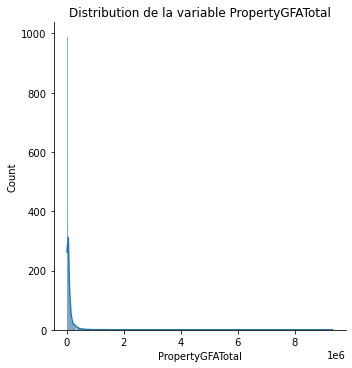

Le coefficient empirique de skewness est: 20.786187482959065


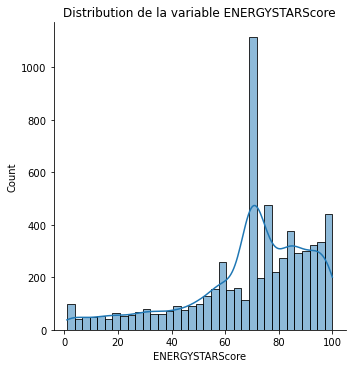

Le coefficient empirique de skewness est: -1.0470987040793722


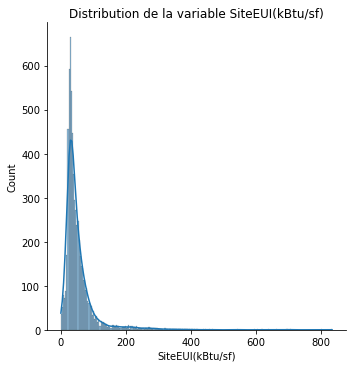

Le coefficient empirique de skewness est: 5.05360899633793


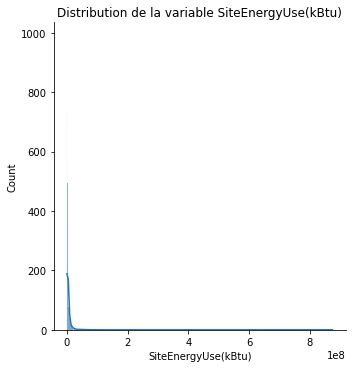

Le coefficient empirique de skewness est: 23.845583464010346


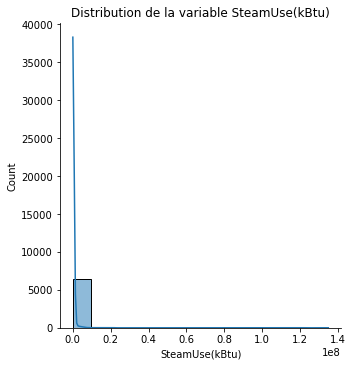

Le coefficient empirique de skewness est: 28.89720896202469


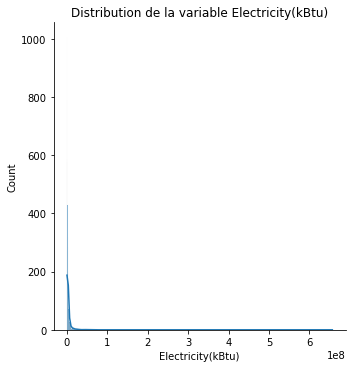

Le coefficient empirique de skewness est: 27.363783009481068


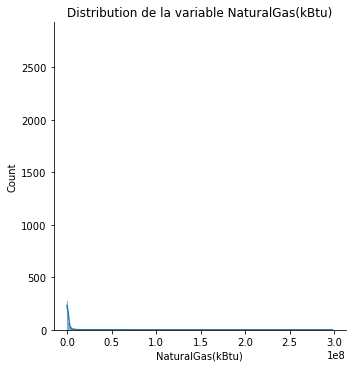

Le coefficient empirique de skewness est: 28.420640501250464


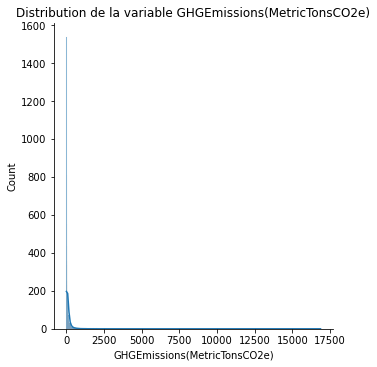

Le coefficient empirique de skewness est: 19.48529844293889


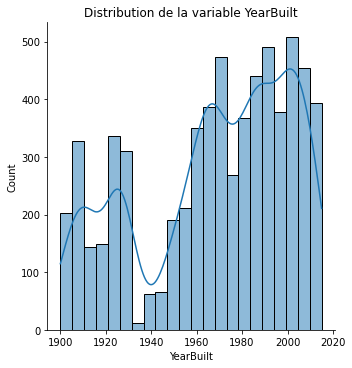

Le coefficient empirique de skewness est: -0.5441838820280888


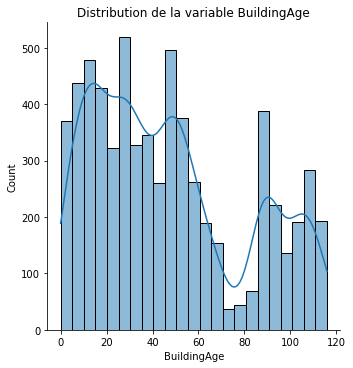

Le coefficient empirique de skewness est: 0.544548620239454


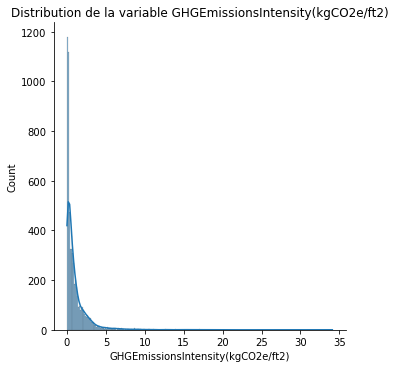

Le coefficient empirique de skewness est: 5.195946674508556


In [72]:
listeVariablesContinues = ['PropertyGFATotal', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 
                          'Electricity(kBtu)', 'NaturalGas(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'YearBuilt', 'BuildingAge',
                           'GHGEmissionsIntensity(kgCO2e/ft2)']

for var in listeVariablesContinues:
    sns.displot(df[var],kde=True)
    plt.title('Distribution de la variable ' + var)
    plt.show()
    print("Le coefficient empirique de skewness est: "+str(df[var].skew()))

On remarque que parmi les variables continues d'intérêt, pas une n'a de distribution symétrique. On va appliquer une transformation logarithmique pour obtenir des distributions gaussiennes afin d'améliorer par la suite les modèles de prédiction.

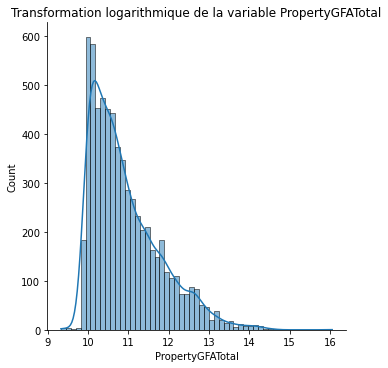

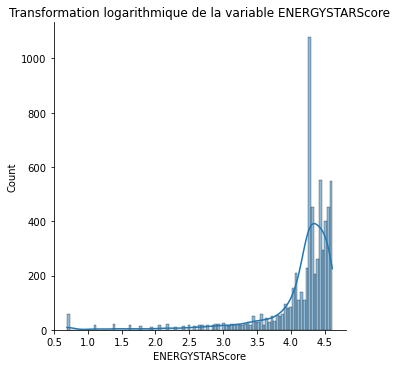

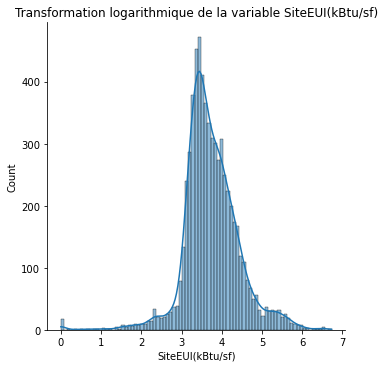

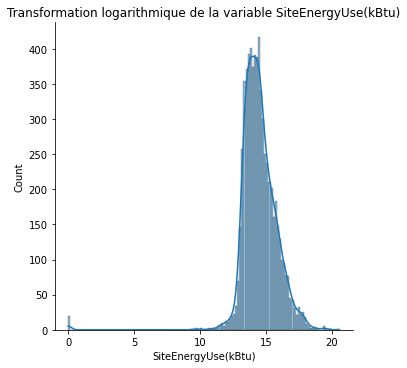

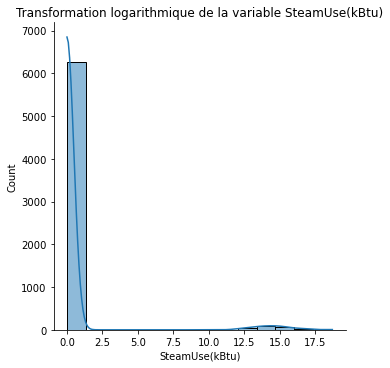

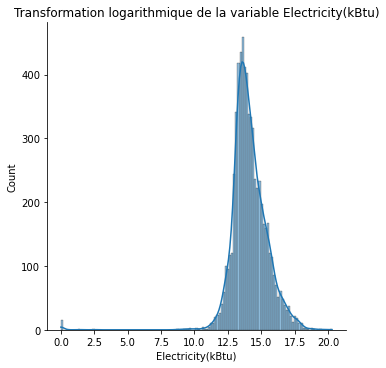

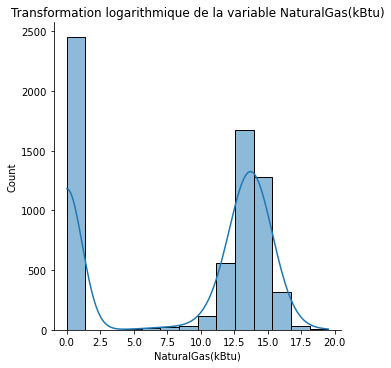

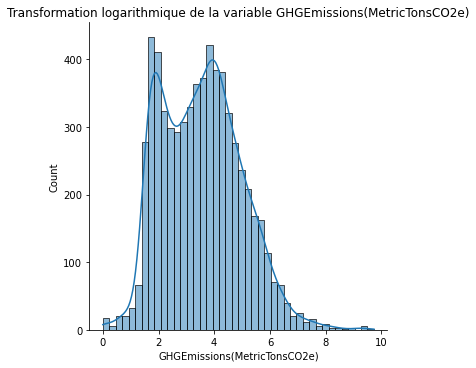

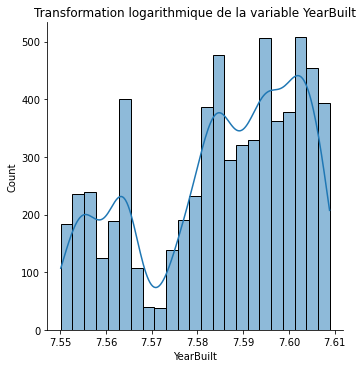

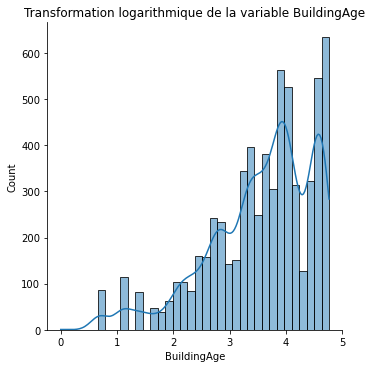

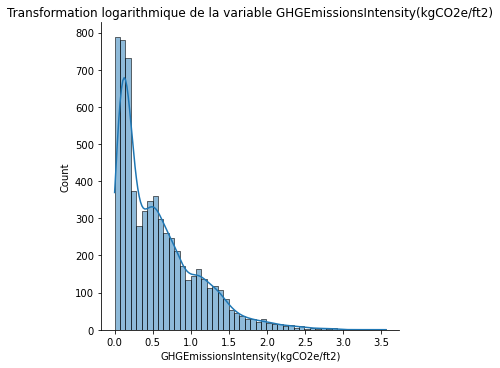

In [73]:
for var in listeVariablesContinues:
    df[var] = np.log(df[var]+1) #On ajoute 1 pour ne pas avoir de problèmes de division par 0
    sns.displot(df[var], kde=True)
    plt.title("Transformation logarithmique de la variable "+var)
    plt.show()

## <a name="C16">4.4: Sélection des variables pertinentes</a>
On va supprimer les variables qui ne semblent pas intéressantes et celles auquelles on ne pourra pas avoir accès pour la prédiction sur les nouveaux bâtiments. Par exemple, pour un nouveau bâtiment, on ne connaîtra pas sa consommation en électricité et gaz, on ne peut donc pas utiliser ces variables dans les modèles de prédiction. D'autant plus que si ces données sont connues, alors la consommation totale d'énergie et la quantité d'émissions de CO2 en découlent presque automatiquement et ne ne nécessitent pas le développement et la mise en production de modèles de prédiction.

In [74]:
listeVariables = ['OSEBuildingID', 'DataYear', 'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 
                  'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
                 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 
                 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)', 'Electricity(kWh)', 'NaturalGas(therms)', 'DefaultData', 
                 'ComplianceStatus', 'Outlier', 'Latitude', 'Longitude', 'Address', 'City', 'State', 'ZipCode', 
                  'SiteEUI(kBtu/sf)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 
                  'GHGEmissionsIntensity(kgCO2e/ft2)']

df = df.drop(listeVariables, axis=1)
data = data.drop(listeVariables, axis=1)
df.head()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),BuildingAge,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Distribution Center\n,PrimaryPropertyType_High-Rise Multifamily,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mid-Rise Multifamily,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Non-Refrigerated Warehouse,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Residence Hall/Dormitory,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Restaurant\n,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Self-Storage Facility\n,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_Supermarket/Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,Neighborhood_Ballard,Neighborhood_CENTRAL,Neighborhood_Central,Neighborhood_DELRIDGE,Neighborhood_DELRIDGE NEIGHBORHOODS,Neighborhood_DOWNTOWN,...,SecondLargestPropertyUseType_Repair Services (Vehicle,SecondLargestPropertyUseType_Residence Hall/Dormitory,SecondLargestPropertyUseType_Restaurant,SecondLargestPropertyUseType_Retail Store,SecondLargestPropertyUseType_Self-Storage Facility,SecondLargestPropertyUseType_Senior Care Community,SecondLargestPropertyUseType_Shoe,SecondLargestPropertyUseType_Social/Meeting Hall,SecondLargestPropertyUseType_Strip Mall,SecondLargestPropertyUseType_Supermarket/Grocery Store,SecondLargestPropertyUseType_Swimming Pool,SecondLargestPropertyUseType_Worship Facility,ThirdLargestPropertyUseType_Financial Office,ThirdLargestPropertyUseType_Locksmith,ThirdLargestPropertyUseType_Manufacturing/Industrial Plant,ThirdLargestPropertyUseType_Medical Office,ThirdLargestPropertyUseType_Movie Theater,ThirdLargestPropertyUseType_Multifamily Housing,ThirdLargestPropertyUseType_Museum,ThirdLargestPropertyUseType_NoThirdUse,ThirdLargestPropertyUseType_Non-Refrigerated Warehouse,ThirdLargestPropertyUseType_Office,ThirdLargestPropertyUseType_Other,ThirdLargestPropertyUseType_Other - Education,ThirdLargestPropertyUseType_Other - Entertainment/Public Assembly,ThirdLargestPropertyUseType_Other - Lodging/Residential,ThirdLargestPropertyUseType_Other - Mall,ThirdLargestPropertyUseType_Other - Public Services,ThirdLargestPropertyUseType_Other - Recreation,ThirdLargestPropertyUseType_Other - Restaurant/Bar,ThirdLargestPropertyUseType_Other - Services,ThirdLargestPropertyUseType_Other - Technology/Science,ThirdLargestPropertyUseType_Outpatient Rehabilitation/Physical Therapy,ThirdLargestPropertyUseType_Parking,ThirdLargestPropertyUseType_Personal Services (Health/Beauty,ThirdLargestPropertyUseType_Pre-school/Daycare,ThirdLargestPropertyUseType_Refrigerated Warehouse,ThirdLargestPropertyUseType_Repair Services (Vehicle,ThirdLargestPropertyUseType_Residence Hall/Dormitory,ThirdLargestPropertyUseType_Restaurant,ThirdLargestPropertyUseType_Retail Store,ThirdLargestPropertyUseType_Self-Storage Facility,ThirdLargestPropertyUseType_Senior Care Community,ThirdLargestPropertyUseType_Shoe,ThirdLargestPropertyUseType_Social/Meeting Hall,ThirdLargestPropertyUseType_Supermarket/Grocery Store,ThirdLargestPropertyUseType_Swimming Pool,ThirdLargestPropertyUseType_Vocational School,ThirdLargestPropertyUseType_Worship Facility,ThirdLargestPropertyUseType_etc)
0,7.564238,1,1,11.390023,4.189655,15.758764,5.523179,4.4886

# <a name="C17">Partie 5: Exploration des données</a>
Maintenant que le jeu de données est prêt et avant de se lancer dans des modèles de prédiction, on va explorer notre jeu de données afin de mieux comprendre les données. On s'intéressera aux données avant et après transformation.
## <a name="C18">5.1: Représentation empirique des variables</a>
On s'intéresse tout d'abord à la répartition des catégories de bâtiments.

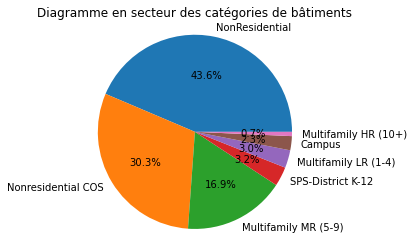

In [75]:
# Diagramme en secteurs
plt.pie(data['BuildingType'].value_counts(normalize=False), labels=data['BuildingType'].unique(), autopct='%1.1f%%')
plt.axis('equal')
plt.title('Diagramme en secteur des catégories de bâtiments')
plt.show()

In [76]:
effectifs = data['LargestPropertyUseType'].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

# création du tableau à partir des modalités
tab = pd.DataFrame(modalites, columns = ['Type de bâtiment']) 
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(data)

tab.head(10)

,Type de bâtiment,n,f
0,Multifamily Housing,3194,0.489577
1,Office,885,0.135653
2,Non-Refrigerated Warehouse,457,0.070049
3,K-12 School,291,0.044605
4,Other,177,0.027131
5,Hotel,149,0.022839
6,Medical Office,132,0.020233
7,Parking,121,0.018547
8,Distribution Center,120,0.018394
9,Retail Store,112,0.017167


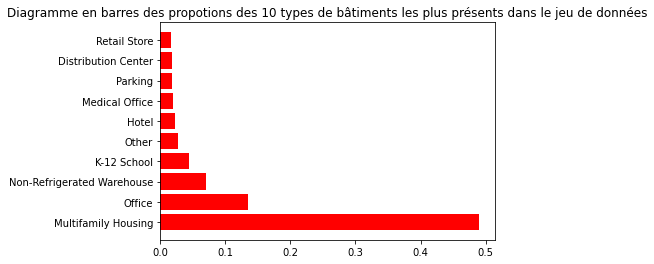

In [77]:
plt.barh(y=tab.iloc[:10,0], width=tab.iloc[:10,2], color='red')
plt.title('Diagramme en barres des propotions des 10 types de bâtiments les plus présents dans le jeu de données')
plt.show()

La moitié des bâtiments du jeu de données sont des immeubles. Ensuite ce sont les bureaux et les entrepôts qui sont les plus présents.

Un des objetcifs est d'évaluer l'intérêt de l'Energy Star Score dans la prédiction des émissions. On peut déjà commencer par regarder sa distribution empirique de plus près.

In [78]:
data['ENERGYSTARScore'].describe()

count    6524.000000
mean       69.165696
std        23.440191
min         1.000000
25%        59.000000
50%        71.000000
75%        86.000000
max       100.000000
Name: ENERGYSTARScore, dtype: float64

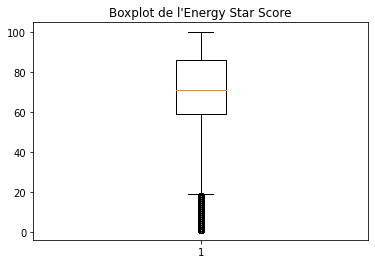

In [79]:
plt.boxplot(data['ENERGYSTARScore'])
plt.title("Boxplot de l'Energy Star Score")
plt.show()

D'après les critères de l'Energy Star Score, les bâtiments avec un score supérieur à 75 sont peu polluants et en accord avec les problèmatiques de développement durable. Ici, presque 50% des bâtiments ont un score d'au moins 75, ce qui est de bonne augure pour la ville de Seattle qui souhaite être neutre en émissions carbonne d'ici 2050.

## <a name="C19">5.2: Analyses Bivariées</a>
Dans cette partie, on va essayer de croiser les variables deux à deux pour trouver de l'information pertinente. On peut commencer par s'intéresser à la matrice des corrélations avant et après transformations.

<AxesSubplot:>

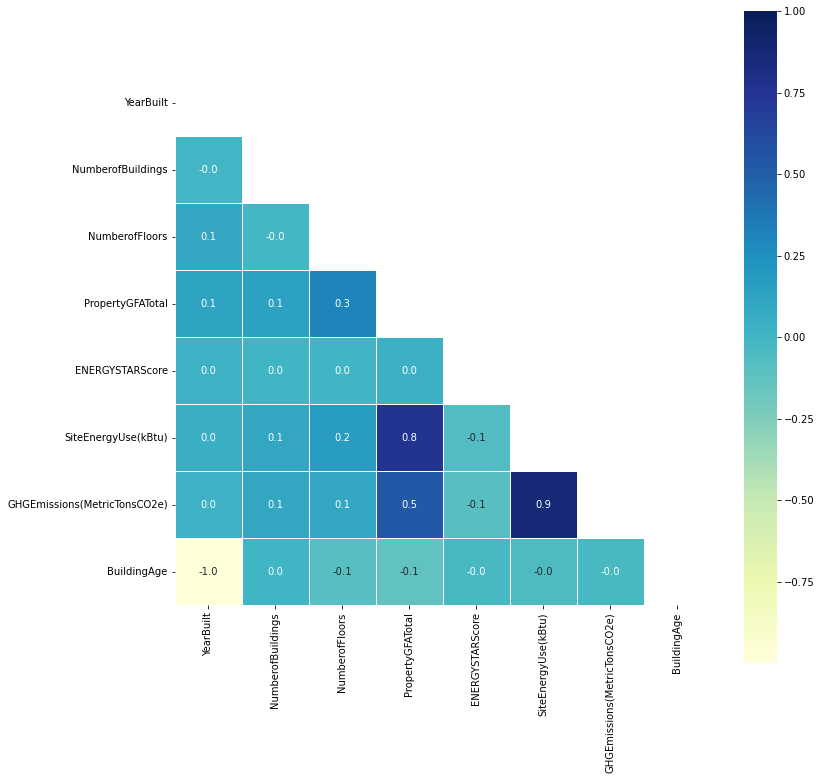

In [80]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12, 12))
plt.xticks(rotation=45)
sns.heatmap(corr, annot=True, cmap='YlGnBu', mask=mask, fmt='.1f', linewidths=.5, square=True, vmax=1)

De manière générale, les principales corrélations qui ressortent sont entre la consommation totale d'énergie et la surface du bâtiment, les consommations des différentes sources d'énergie ou encore les émissions des gaz à effet de serre.

On peut à présent regarder la matrice des corrélations après les transformations effectuées pour voir si il y a des différences significatives au niveau des corrélations.

<AxesSubplot:>

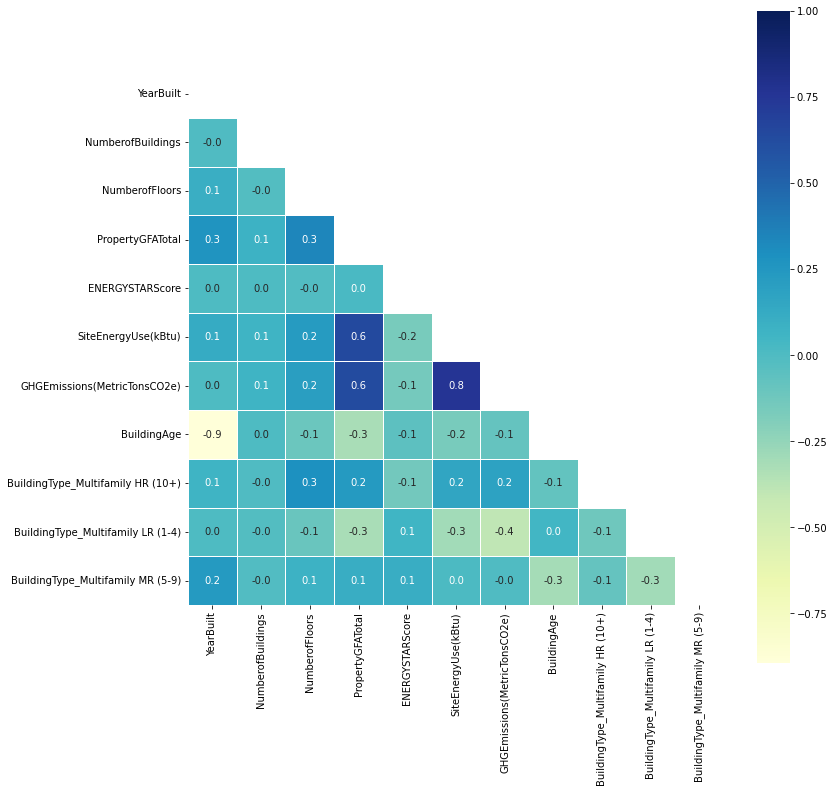

In [81]:
corr = df.iloc[:,:11].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12, 12))
plt.xticks(rotation=45)
sns.heatmap(corr, annot=True, cmap='YlGnBu', mask=mask, fmt='.1f', linewidths=.5, square=True, vmax=1)

Les corrélations après transformations restent relativement semblables à celles avant transformations à deux exceptions près:
- Apparition d'une nouvelle corrélation entre la consommation totale d'énergie et la consommation totale d'énergie rapportée à la surface
- Disparition de la corrélation entre la consommation totale de gaz naturels et la consommation totale d'énergie

On va s'intéresser à présent à la répartition des Energy Star Scores en fonction des types de bâtiment et des quartiers.

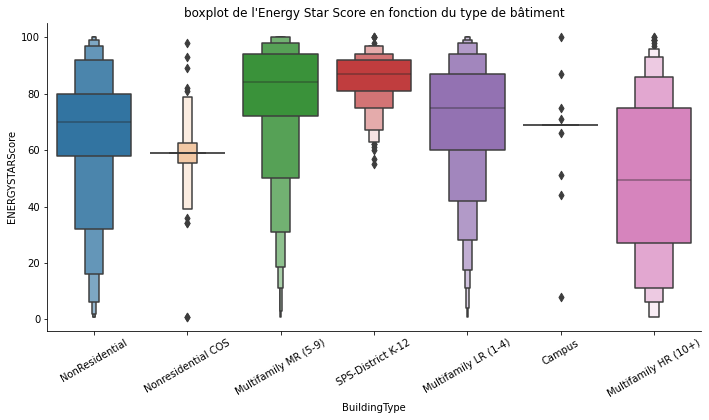

In [82]:
graph = sns.catplot(x='BuildingType', y='ENERGYSTARScore', kind='boxen', data=data, height=5, aspect=2)
graph.set(title="boxplot de l'Energy Star Score en fonction du type de bâtiment")
graph.set_xticklabels(rotation=30)

C'est dans la catégorie `Multifamily HR (10+)` qu'il y a la plus grande proportion de bâtiments avec un faible Energy Star Score. On peut regarder d'un peu plus près cette catégorie.

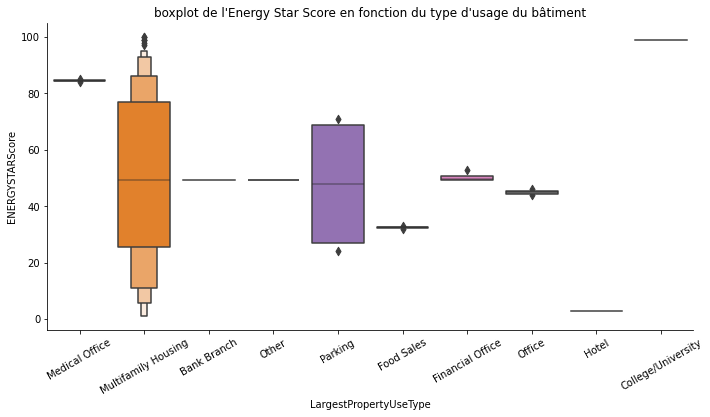

In [83]:
graph = sns.catplot(x='LargestPropertyUseType', y='ENERGYSTARScore', kind='boxen', height=5, aspect=2,
                    data=data[data['BuildingType']=='Multifamily HR (10+)'])
graph.set(title="boxplot de l'Energy Star Score en fonction du type d'usage du bâtiment")
graph.set_xticklabels(rotation=30)

Ce sont majoritairement les immeubles, parkings et bureaux qui ont des faibles scores. C'est peut-être vers ces bâtiments que la ville de Seattle devra concentrer ses investissements énergétiques.

Regardons si la répartition des Energy Star Scores est différente selon le quartier.

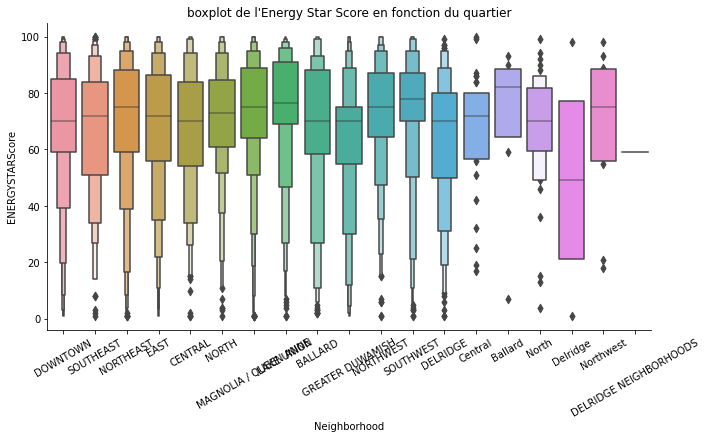

In [84]:
graph = sns.catplot(x='Neighborhood', y='ENERGYSTARScore', kind='boxen', data=data, height=5, aspect=2)
graph.set(title="boxplot de l'Energy Star Score en fonction du quartier")
graph.set_xticklabels(rotation=30)

Les répartitions sont semblables d'un quartier à un autre hormis peut-être pour le quartier **Delridge**. Regardons quels sont les principaux types de bâtiments présents dans ce quartier.

In [85]:
data.loc[data['Neighborhood']=='Delridge', 'LargestPropertyUseType'].value_counts()

Office                        2
Distribution Center           1
Non-Refrigerated Warehouse    1
Name: LargestPropertyUseType, dtype: int64

La différence observée plus haut est dûe au fait qu'il y a peu de données pour ce quartier, et n'est donc pas significative.

# <a name="C20">Partie 6: Exportation des jeux de données<a/>
On peut à présent sauvegarder et exporter les deux jeux de données, avec et sans les transformations logarithmiques. On va avant transfomer les variables catégorielles du jeu **data** pour pouvoir évaluer l'apport des transformations logaritmiques dans les modèles de prédiction.

In [86]:
listeVariablesCategorielles = ['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'LargestPropertyUseType', 
                               'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']

data = pd.get_dummies(data=data, columns=listeVariablesCategorielles, drop_first=True)
data.head()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e),BuildingAge,BuildingType_Multifamily HR (10+),BuildingType_Multifamily LR (1-4),BuildingType_Multifamily MR (5-9),BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Distribution Center\n,PrimaryPropertyType_High-Rise Multifamily,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mid-Rise Multifamily,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Non-Refrigerated Warehouse,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Residence Hall/Dormitory,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Restaurant\n,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Self-Storage Facility\n,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_Supermarket/Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,Neighborhood_Ballard,Neighborhood_CENTRAL,Neighborhood_Central,Neighborhood_DELRIDGE,Neighborhood_DELRIDGE NEIGHBORHOODS,Neighborhood_DOWNTOWN,...,SecondLargestPropertyUseType_Repair Services (Vehicle,SecondLargestPropertyUseType_Residence Hall/Dormitory,SecondLargestPropertyUseType_Restaurant,SecondLargestPropertyUseType_Retail Store,SecondLargestPropertyUseType_Self-Storage Facility,SecondLargestPropertyUseType_Senior Care Community,SecondLargestPropertyUseType_Shoe,SecondLargestPropertyUseType_Social/Meeting Hall,SecondLargestPropertyUseType_Strip Mall,SecondLargestPropertyUseType_Supermarket/Grocery Store,SecondLargestPropertyUseType_Swimming Pool,SecondLargestPropertyUseType_Worship Facility,ThirdLargestPropertyUseType_Financial Office,ThirdLargestPropertyUseType_Locksmith,ThirdLargestPropertyUseType_Manufacturing/Industrial Plant,ThirdLargestPropertyUseType_Medical Office,ThirdLargestPropertyUseType_Movie Theater,ThirdLargestPropertyUseType_Multifamily Housing,ThirdLargestPropertyUseType_Museum,ThirdLargestPropertyUseType_NoThirdUse,ThirdLargestPropertyUseType_Non-Refrigerated Warehouse,ThirdLargestPropertyUseType_Office,ThirdLargestPropertyUseType_Other,ThirdLargestPropertyUseType_Other - Education,ThirdLargestPropertyUseType_Other - Entertainment/Public Assembly,ThirdLargestPropertyUseType_Other - Lodging/Residential,ThirdLargestPropertyUseType_Other - Mall,ThirdLargestPropertyUseType_Other - Public Services,ThirdLargestPropertyUseType_Other - Recreation,ThirdLargestPropertyUseType_Other - Restaurant/Bar,ThirdLargestPropertyUseType_Other - Services,ThirdLargestPropertyUseType_Other - Technology/Science,ThirdLargestPropertyUseType_Outpatient Rehabilitation/Physical Therapy,ThirdLargestPropertyUseType_Parking,ThirdLargestPropertyUseType_Personal Services (Health/Beauty,ThirdLargestPropertyUseType_Pre-school/Daycare,ThirdLargestPropertyUseType_Refrigerated Warehouse,ThirdLargestPropertyUseType_Repair Services (Vehicle,ThirdLargestPropertyUseType_Residence Hall/Dormitory,ThirdLargestPropertyUseType_Restaurant,ThirdLargestPropertyUseType_Retail Store,ThirdLargestPropertyUseType_Self-Storage Facility,ThirdLargestPropertyUseType_Senior Care Community,ThirdLargestPropertyUseType_Shoe,ThirdLargestPropertyUseType_Social/Meeting Hall,ThirdLargestPropertyUseType_Supermarket/Grocery Store,ThirdLargestPropertyUseType_Swimming Pool,ThirdLargestPropertyUseType_Vocational School,ThirdLargestPropertyUseType_Worship Facility,ThirdLargestPropertyUseType_etc)
0,1927,1,1,88434,65.0,6981428.0,249.43,88,0,0,0,1,0,0,0,0,0

In [87]:
data.to_csv('dataNettoye.csv',sep = ',', encoding='utf_8', index=False)
df.to_csv('dataNettoyeTransforme.csv',sep = ',', encoding='utf_8', index=False)